# number of particles = 5000 (i will increase the time to make sure none return)

In [1]:
import particles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (50, 30),
         'axes.labelsize': '30',
         'axes.titlesize':'30',
         'xtick.labelsize':'30',
         'ytick.labelsize':'30'}
# pylab.rcParams.update(params)

In [3]:
plt.rcParams.update(params)

In [4]:
%matplotlib inline

In [5]:
files = ["./data/test_250_nm.txt", 
         "./data/test_500_nm.txt", 
         "./data/test_750_nm.txt",
         "./data/test_1000_nm.txt",
         "./data/test_1250_nm.txt",
         "./data/test_1500_nm.txt",
         "./data/test_1750_nm.txt",
         "./data/test_2000_nm.txt"]

In [7]:
btc_adj = []
btc_first = []
for file_name in files[:]:
    p = particles.Particles(file_name, dimension=2, time_start=0, time_end=20000, time_step=10)
#     p = particles.Particles("./data/test_250_nm.txt", dimension=2, time_start=0, time_end=20000, time_step=100)
    a = (p.qx >= 30)
    a1 = a.sum(axis=0)
    filt = a1!=0
    filt_arr = a1[filt]
    index_for_time = filt_arr.index.values
    r = filt_arr.values

    raw = pd.DataFrame(r)
    raw.index = p.time[index_for_time]
    raw.columns = [file_name]
    btc_first.append(raw)
### shift the particles so the sum is N_tot
    f = np.zeros(r.shape)
    f[0] = r[0]
    for i in range(p.time[[index_for_time]].shape[0]-1):
        f[i+1] = r[i+1] - r[i]
    test = pd.DataFrame(f)
    test.index = p.time[index_for_time]
    test = test[test[0]>=0]
    btc_adj.append(test)
#     print(test.head())
    print("The total number of particles in the media (not computed with moments) is : {1} for the size: {0} [nm]".format(file_name.split("_")[-2],test.sum()[0]))

The total number of particles in the media (not computed with moments) is : 10001.0 for the size: 250 [nm]
The total number of particles in the media (not computed with moments) is : 10003.0 for the size: 500 [nm]
The total number of particles in the media (not computed with moments) is : 10001.0 for the size: 750 [nm]
The total number of particles in the media (not computed with moments) is : 10007.0 for the size: 1000 [nm]
The total number of particles in the media (not computed with moments) is : 10007.0 for the size: 1250 [nm]
The total number of particles in the media (not computed with moments) is : 10003.0 for the size: 1500 [nm]
The total number of particles in the media (not computed with moments) is : 10014.0 for the size: 1750 [nm]
The total number of particles in the media (not computed with moments) is : 10005.0 for the size: 2000 [nm]


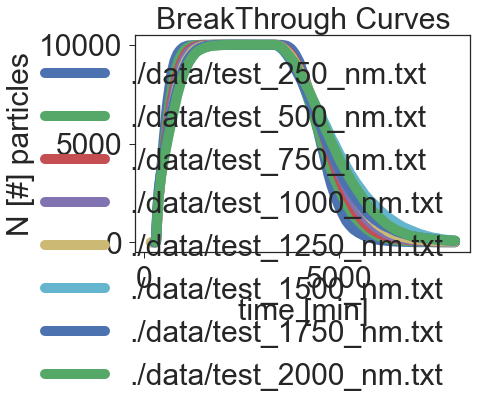

In [8]:
for e in btc_first:
    w = e[e.columns[0]]
    lc = np.where(w.index.values <= 8000)[0][-1]
    data = pd.DataFrame(w.iloc[:lc])
    plt.plot(data.index, data[e.columns[0]],linewidth=10)
plt.title("BreakThrough Curves")
plt.xlabel("time [min]")
plt.ylabel("N [#] particles")
plt.legend(fontsize=30);

In [9]:
moments = []
# weights = []
for k, d in enumerate(btc_adj):
    print(files[k])
    time_par , pos_par = d.index.values, d[0].values/100 # this needs to change to something in regards to the timestep.
    print(d.sum()[0])
    tp = np.zeros(time_par.shape[0]+1)
    tp[1:] = time_par
    tp[0] = time_par[0] - 100 # 100 is the time step.
    pp = np.zeros(pos_par.shape[0]+1)
    pp[1:] = pos_par
    pp[0] = 0
    moment_vector = np.zeros(len(tp))
    
    sub_mo = []
    for m in range(4):
        
        n_moment_order = m
#         print("computing...")
        for i in range(0,tp.shape[0] - 1):    
            dt = (tp[i + 1] - tp[i])
    #         print(dt)
            moment_vector[i] = 0.5 * \
                            ((((tp[i + 1] ** n_moment_order) * pp[i + 1]) + \
                              ((tp[i] ** n_moment_order) * pp[i]))) *100
        a = sum(moment_vector)
        sub_mo.append(a/d.sum()[0]) # normalize
#         print("The {0} th moment is: {1}".format(m, a))
    moments.append(sub_mo)


./data/test_250_nm.txt
10001.0
./data/test_500_nm.txt
10003.0
./data/test_750_nm.txt
10001.0
./data/test_1000_nm.txt
10007.0
./data/test_1250_nm.txt
10007.0
./data/test_1500_nm.txt
10003.0
./data/test_1750_nm.txt
10014.0
./data/test_2000_nm.txt
10005.0


# Momements Normalized

## first

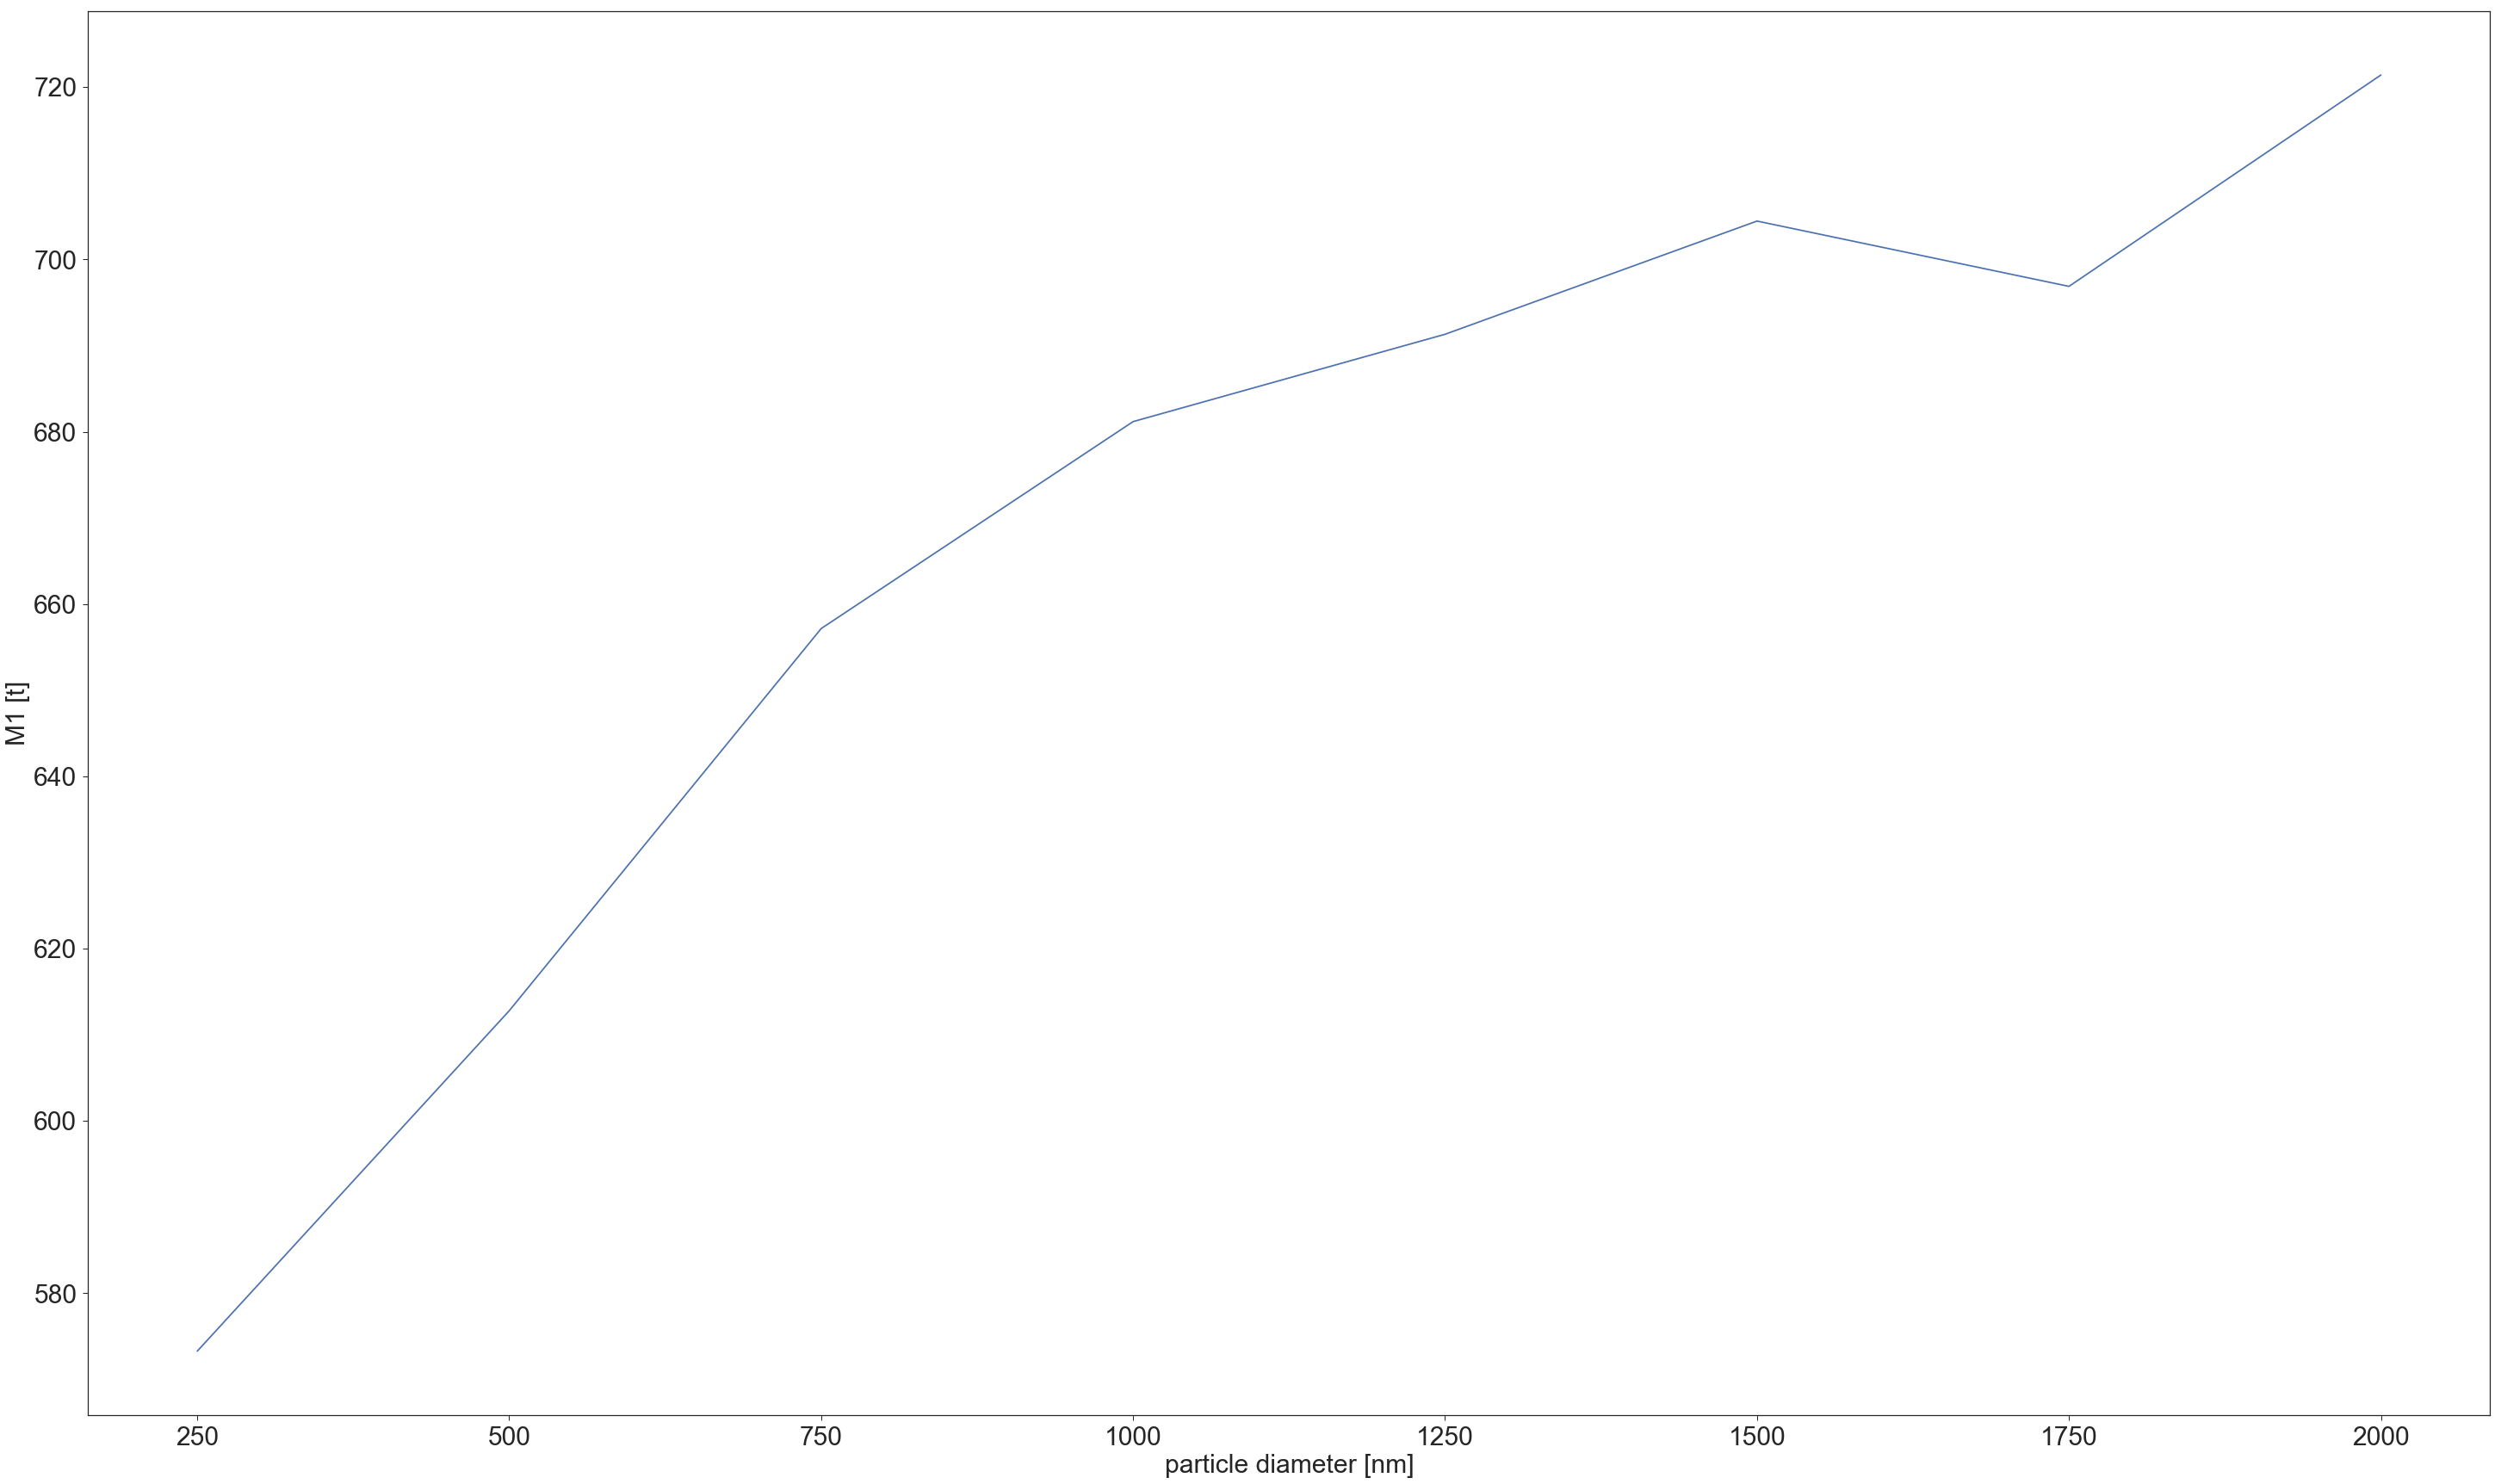

In [31]:
a,b = [int(d.split('_')[-2]) for d in files] , np.array(moments)[:,1]
plt.plot(a,b)
plt.ylabel('M1 [t]')
plt.xlabel("particle diameter [nm]")

## second

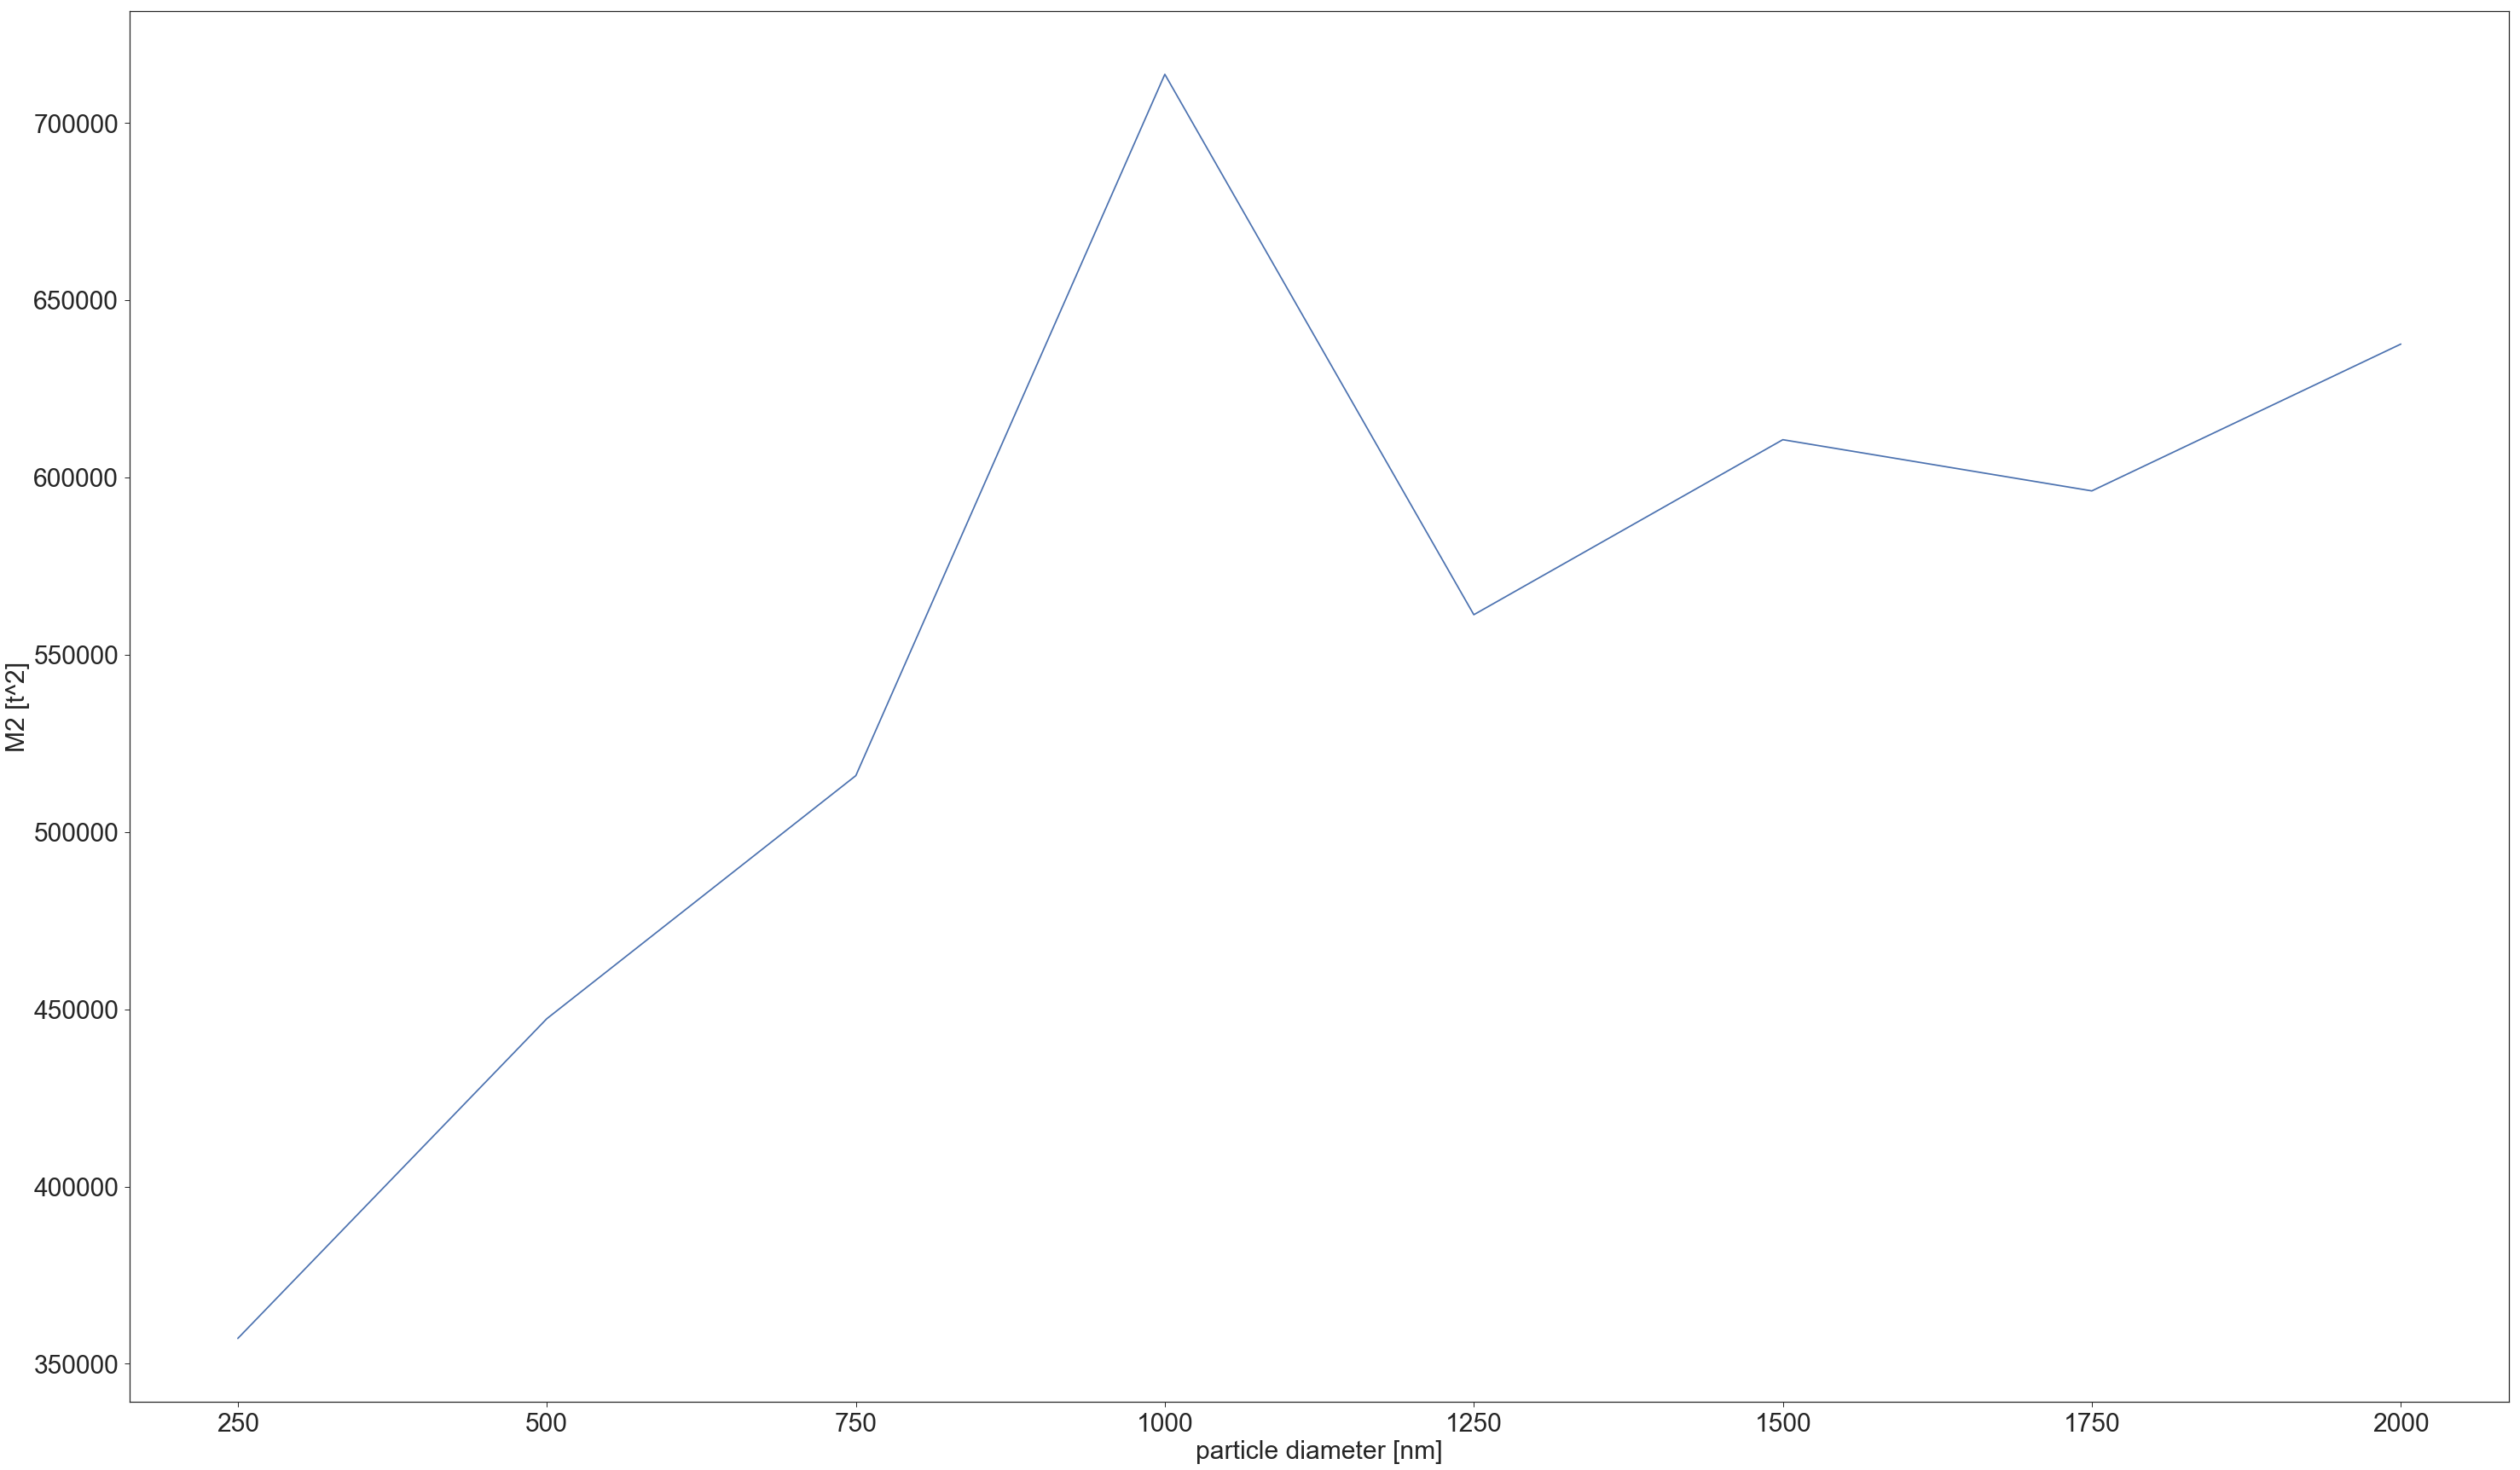

In [32]:
a,b = [int(d.split('_')[-2]) for d in files] , np.array(moments)[:,2]
plt.plot(a,b)
plt.ylabel('M2 [t^2]')
plt.xlabel("particle diameter [nm]")

# Still to be examined of the physical description of the graph.

test.plot()
plt.ylabel("N [#]")
plt.xlabel("t [min]")

test.sum()

# The rate of particles exit at various times

### divided by time step

(test/100)[0].plot()
plt.title("The rate of particles passing through the barrier (used for the moment calculation)")
plt.ylabel("N/dt [#/[min]]")
plt.xlabel("t [min]")

f[f>=0].sum()

f

f = f[f>0] #.sum()

for i in range(60):
    f[i+1] = r[i+1] - r[i]
plt.plot(f[(f!=0) & (f!=0)]);


>>> x = np.array([2,8,3,4,7,6,1])
>>> lix = x > 4
>>> x = x[lix] # this "drops" everything 4 or less
>>> x
array([8, 7, 6])
>>> [dropped] = np.where(~lix) # find the indices that weren't dropped
>>> dropped
array([0, 2, 3, 6])

[dropped] = np.where(~lix)

f[f<0]

test.sum()

f[f>=0].sum()

test

# time_par , pos_par = p.time[[index_for_time]], f/100
time_par , pos_par = test.index.values, test[0].values/100

n_moment_order=0
moment_vector = np.zeros(len(time_par))

for i in range(len(time_par) - 1):
    
    dt = (time_par[i + 1] - time_par[i])
#     print(time_par[i])
#     print(dt)
    moment_vector[i] = 0.5 * (
        (((time_par[i + 1] ** n_moment_order) * pos_par[i + 1]) + ((time_par[i] ** n_moment_order) * pos_par[i]))) *dt

a = sum(moment_vector)

print(a)

f

f.sum()

time_par

pos_par

np.where(f<0)





time_par , pos_par = test.index.values, test[0].values/100
tp = np.zeros(time_par.shape[0]+1)
tp[1:] = time_par
tp[0] = time_par[0] -100 # 100 is the time step.
pp = np.zeros(pos_par.shape[0]+1)
pp[1:] = pos_par
pp[0] = 0
n_moment_order = 0
for i in range(0,len(tp) - 1):    
    dt = (tp[i + 1] - tp[i])
#     print(time_par[i])
#     print(dt)
    moment_vector[i] = 0.5 * ((((tp[i + 1] ** n_moment_order) * pp[i + 1]) + ((tp[i] ** n_moment_order) * pp[i]))) *dt
a = sum(moment_vector)
print(a)

# this is the solution a leading zero!

# add a leading zero !!!!!!!!!MFER%@#$$@#%
# time_par , pos_par = p.time[[index_for_time]], f/100
time_par , pos_par = test.index.values, test[0].values/100
tp = np.zeros(time_par.shape[0]+1)
tp[1:] = time_par
tp[0] = time_par[0] -100 # 100 is the time step.
pp = np.zeros(pos_par.shape[0]+1)
pp[1:] = pos_par
pp[0] = 0

n_moment_order=1
moment_vector = np.zeros(len(tp))
for i in range(0,len(tp) - 1):
    dt = (tp[i + 1] - tp[i])
#     print(tp[i])
#     print(dt)
    moment_vector[i] = 0.5 * (pp[i + 1] + pp[i]) * dt
a = sum(moment_vector)
print(a)

n_moment_order = 0
for i in range(0,len(tp) - 1):    
    dt = (tp[i + 1] - tp[i])
#     print(time_par[i])
#     print(dt)
    moment_vector[i] = 0.5 * ((((tp[i + 1] ** n_moment_order) * pp[i + 1]) + ((tp[i] ** n_moment_order) * pp[i]))) *dt
a = sum(moment_vector)
print(a)

pp

# add a leading zero !!!!!!!!!MFER%@#$$@#%
time_par , pos_par = test.index, test[0].values/100
tp = np.zeros(time_par.shape[0]+1)
print(tp)
tp[1:] = time_par
print(tp)
tp[0] = 800
pp = np.zeros(pos_par.shape[0]+1)
pp[1:] = pos_par
pp[0] = 0

# time_par , pos_par = p.time[[index_for_time]], f/100
n_moment_order=0
moment_vector = np.zeros(len(tp))

for i in range(0,len(tp) - 1):
    
    dt = (tp[i + 1] - tp[i])
    
    moment_vector[i] = 0.5 * (pp[i + 1] + pp[i]) * dt
    
a = sum(moment_vector)

print(a)